In [31]:
import tensorflow as tf
import cv2
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

# Paths
main_directory = 'C:/Users/Nacho/Documents/TELECO_6/TFG/Datasets/images_original'
#copy_directory = 'C:/Users/Nacho/Documents/TELECO_6/TFG/Datasets/images_copy'
images_cropped = 'C:/Users/Nacho/Documents/TELECO_6/TFG/Datasets/images_cropped'
#copy_directory = 'C:/Users/Nacho/Documents/TELECO_6/TFG/Datasets/images_augmented'
#new_directory = 'C:/Users/Nacho/Documents/TELECO_6/TFG/Datasets/images_augmented_cropped'
#copy_directory = 'C:/Users/Nacho/Documents/TELECO_6/TFG/Datasets/images_augmented_x3'
images_aug_crop = 'C:/Users/Nacho/Documents/TELECO_6/TFG/Datasets/images_augmented_x3_cropped'

batch_size = 32
img_height = 128#217
img_width = 128#334

A cropping is needed to get rid of the white frame in each Mel-Spectrogram image. In order to achieve this, it is necessary to create a new directory, same as the original dataset containing the preprocessed images.

In [32]:
train_ds, val_ds = tf.keras.utils.image_dataset_from_directory(
    images_aug_crop,
    validation_split=0.2,
    subset="both",
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size)


Found 2994 files belonging to 10 classes.
Using 2396 files for training.
Using 598 files for validation.


In [33]:
class_names = train_ds.class_names
print(class_names)

['blues', 'classical', 'country', 'disco', 'hiphop', 'jazz', 'metal', 'pop', 'reggae', 'rock']


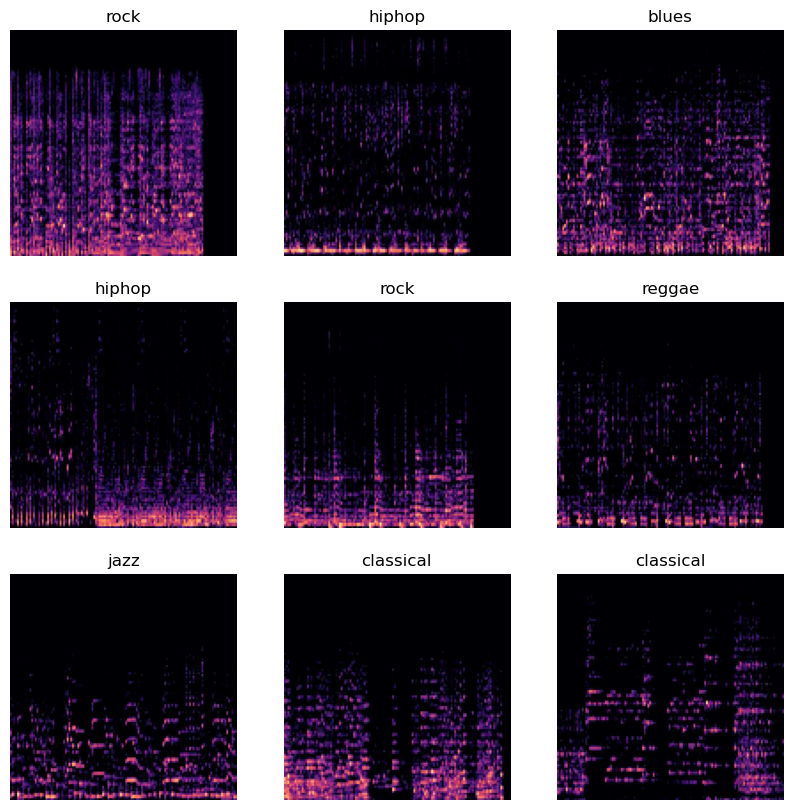

In [34]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")


In [47]:
# CNN model 1
num_classes = len(class_names)

model = Sequential([
  layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

model.summary()

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

epochs=100
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_6 (Rescaling)     (None, 128, 128, 3)       0         
                                                                 
 conv2d_49 (Conv2D)          (None, 128, 128, 16)      448       
                                                                 
 max_pooling2d_49 (MaxPoolin  (None, 64, 64, 16)       0         
 g2D)                                                            
                                                                 
 conv2d_50 (Conv2D)          (None, 64, 64, 32)        4640      
                                                                 
 max_pooling2d_50 (MaxPoolin  (None, 32, 32, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_51 (Conv2D)          (None, 32, 32, 64)      

Epoch 43/100
75/75 [==============================] - 33s 428ms/step - loss: 2.1539e-04 - accuracy: 1.0000 - val_loss: 2.2952 - val_accuracy: 0.6639
Epoch 44/100
75/75 [==============================] - 33s 436ms/step - loss: 1.0258e-04 - accuracy: 1.0000 - val_loss: 2.2995 - val_accuracy: 0.6656
Epoch 45/100
75/75 [==============================] - 33s 432ms/step - loss: 1.1989e-04 - accuracy: 1.0000 - val_loss: 2.3026 - val_accuracy: 0.6739
Epoch 46/100
75/75 [==============================] - 33s 439ms/step - loss: 1.8951e-04 - accuracy: 1.0000 - val_loss: 2.2769 - val_accuracy: 0.6722
Epoch 47/100
75/75 [==============================] - 34s 443ms/step - loss: 1.1404e-04 - accuracy: 1.0000 - val_loss: 2.3631 - val_accuracy: 0.6589
Epoch 48/100
75/75 [==============================] - 39s 506ms/step - loss: 1.4624e-04 - accuracy: 1.0000 - val_loss: 2.4234 - val_accuracy: 0.6689
Epoch 49/100
75/75 [==============================] - 36s 465ms/step - loss: 1.3000e-04 - accuracy: 1.0000

Epoch 99/100
75/75 [==============================] - 32s 423ms/step - loss: 9.8230e-05 - accuracy: 1.0000 - val_loss: 2.6181 - val_accuracy: 0.6472
Epoch 100/100
75/75 [==============================] - 32s 415ms/step - loss: 8.3980e-05 - accuracy: 1.0000 - val_loss: 2.6275 - val_accuracy: 0.6438


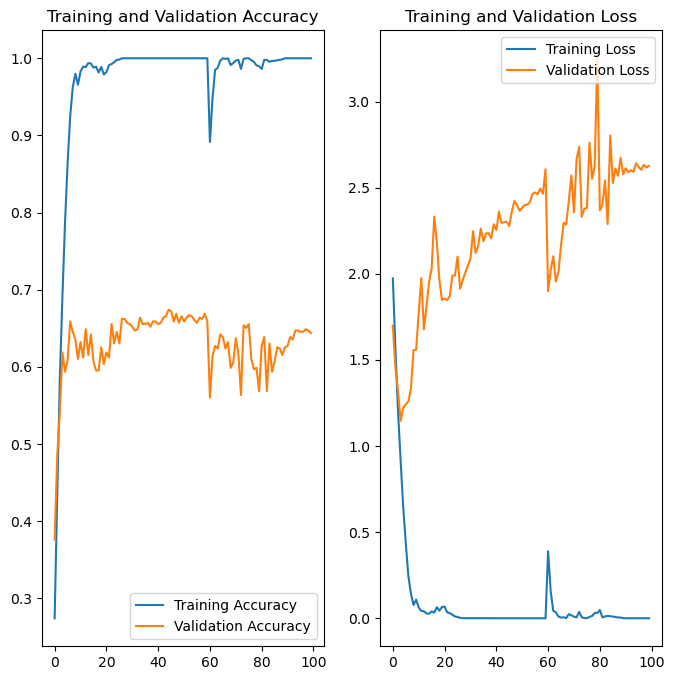

In [48]:
graph_path = 'C:/Users/Nacho/Documents/TELECO_6/TFG/Experimentos/6_128_128_100_epoch_aug+cropped'
cnn_model = '/cnn_model_1'
#os.mkdir(graph_path)

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')

plt.savefig(graph_path + cnn_model)
plt.show()

In [41]:
# CNN model 2
num_classes = len(class_names)

model = keras.Sequential([
  layers.Input(shape=(img_height, img_width, 3)),
    
  layers.Conv2D(16, 3, 1, padding='same', activation='relu'),
  layers.MaxPooling2D(2, 2),
  layers.Dropout(0.2),

  layers.Conv2D(32, 3, 1, padding='same', activation='relu'),
  layers.MaxPooling2D(2, 2),
  layers.Dropout(0.2),
    
  layers.Conv2D(64, 3, 1, padding='same', activation='relu'),
  layers.MaxPooling2D(2, 2),
  layers.Dropout(0.2),
    
  layers.Conv2D(128, 3, 1, padding='same', activation='relu'),
  layers.MaxPooling2D(2, 2),
  layers.Dropout(0.2),
    
  layers.Conv2D(256, 3, 1, padding='same', activation='relu'),
  layers.MaxPooling2D(2, 2),
  layers.Dropout(0.2),
    
  
  layers.Flatten(),
  layers.Dropout(0.5),
    
  layers.Dense(num_classes, activation='softmax')
])

model.summary()

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

epochs=100
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_35 (Conv2D)          (None, 128, 128, 16)      448       
                                                                 
 max_pooling2d_35 (MaxPoolin  (None, 64, 64, 16)       0         
 g2D)                                                            
                                                                 
 dropout_29 (Dropout)        (None, 64, 64, 16)        0         
                                                                 
 conv2d_36 (Conv2D)          (None, 64, 64, 32)        4640      
                                                                 
 max_pooling2d_36 (MaxPoolin  (None, 32, 32, 32)       0         
 g2D)                                                            
                                                                 
 dropout_30 (Dropout)        (None, 32, 32, 32)       

Epoch 36/100
75/75 [==============================] - 43s 563ms/step - loss: 0.5687 - accuracy: 0.7951 - val_loss: 0.7957 - val_accuracy: 0.7174
Epoch 37/100
75/75 [==============================] - 49s 645ms/step - loss: 0.5062 - accuracy: 0.8230 - val_loss: 0.7118 - val_accuracy: 0.7559
Epoch 38/100
75/75 [==============================] - 55s 713ms/step - loss: 0.5050 - accuracy: 0.8201 - val_loss: 0.7519 - val_accuracy: 0.7358
Epoch 39/100
75/75 [==============================] - 46s 598ms/step - loss: 0.5199 - accuracy: 0.8159 - val_loss: 0.7100 - val_accuracy: 0.7358
Epoch 40/100
75/75 [==============================] - 44s 581ms/step - loss: 0.5031 - accuracy: 0.8184 - val_loss: 0.7755 - val_accuracy: 0.7324
Epoch 41/100
75/75 [==============================] - 44s 580ms/step - loss: 0.4836 - accuracy: 0.8322 - val_loss: 0.7200 - val_accuracy: 0.7358
Epoch 42/100
75/75 [==============================] - 44s 585ms/step - loss: 0.5009 - accuracy: 0.8239 - val_loss: 0.7863 - val_ac

75/75 [==============================] - 44s 575ms/step - loss: 0.2778 - accuracy: 0.9098 - val_loss: 0.7076 - val_accuracy: 0.7692
Epoch 93/100
75/75 [==============================] - 44s 583ms/step - loss: 0.2221 - accuracy: 0.9228 - val_loss: 0.7631 - val_accuracy: 0.7843
Epoch 94/100
75/75 [==============================] - 43s 563ms/step - loss: 0.2941 - accuracy: 0.9028 - val_loss: 0.7187 - val_accuracy: 0.7609
Epoch 95/100
75/75 [==============================] - 42s 558ms/step - loss: 0.2803 - accuracy: 0.9124 - val_loss: 0.7667 - val_accuracy: 0.7592
Epoch 96/100
75/75 [==============================] - 43s 562ms/step - loss: 0.2715 - accuracy: 0.9044 - val_loss: 0.6762 - val_accuracy: 0.7793
Epoch 97/100
75/75 [==============================] - 42s 555ms/step - loss: 0.2432 - accuracy: 0.9178 - val_loss: 0.6224 - val_accuracy: 0.8161
Epoch 98/100
75/75 [==============================] - 43s 562ms/step - loss: 0.2320 - accuracy: 0.9245 - val_loss: 0.6935 - val_accuracy: 0.796